### Fancyful plots using Matplotlib library

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import scienceplots as sp

plt.style.use(['notebook','bright'])

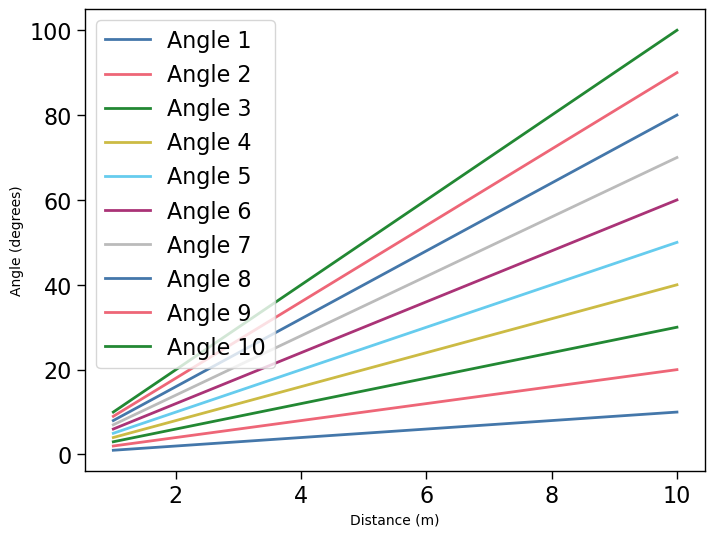

In [2]:
distance = np.asarray([1,2,3,4,5,6,7,8,9,10])
angle = np.asarray([[1,2,3,4,5,6,7,8,9,10],[2,4,6,8,10,12,14,16,18,20],[3,6,9,12,15,18,21,24,27,30],[4,8,12,16,20,24,28,32,36,40],[5,10,15,20,25,30,35,40,45,50],[6,12,18,24,30,36,42,48,54,60],[7,14,21,28,35,42,49,56,63,70],[8,16,24,32,40,48,56,64,72,80],[9,18,27,36,45,54,63,72,81,90],[10,20,30,40,50,60,70,80,90,100]])

for i in range(0,len(angle)):
    plt.plot(distance,angle[i],label='Angle '+str(i+1))

plt.xlabel('Distance (m)')
plt.ylabel('Angle (degrees)')
plt.legend()

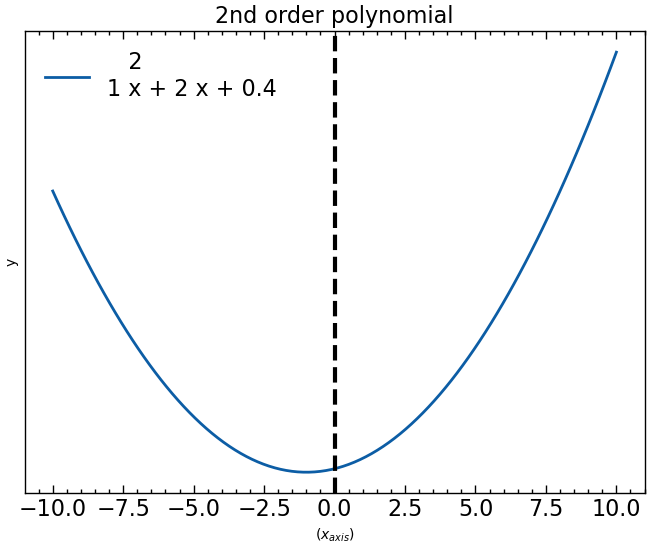

In [2]:
## MATPLOTLIB 


poly_coeefs = [1,2,0.4]
p = np.poly1d(poly_coeefs)
array = np.asarray([[x,p(x)] for x in np.linspace(-10,10,100)])

#plt.rcParams.update({'font.size': 14,'font.sans-serif': 'Arial'}) # plt.rcParams.keys() for full customisation
plt.plot(array[:,0],array[:,1],label=fr'{p}')
plt.title(fr'{len(poly_coeefs)-1}nd order polynomial')
plt.xlabel(r'($x_{axis}$)')
plt.ylabel('y')
plt.yticks([], [])
plt.axvline(0,linewidth=3,color='black',linestyle='--')
#plt.text(1.4, 80, 'x=0',fontsize=20, ha='center')
plt.legend(loc='best')



[ 2.0000e+00  3.3870e+03 -5.8671e+01  3.3870e+03 -5.8671e+01  7.8365e-04
  1.7170e+00  0.0000e+00]


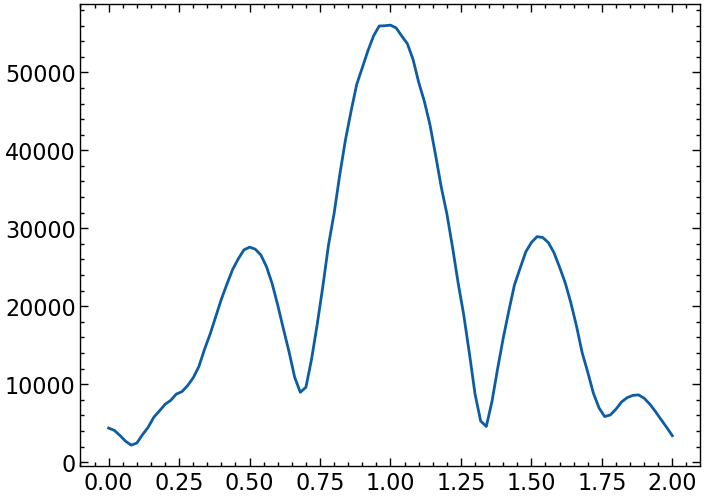

In [3]:
scan = np.loadtxt('scan_data.txt')

print(scan[-1])
plt.plot(scan[:,0],scan[:,1])
arr = []

In [30]:
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)

scan_mod = []
for x in scan:
    scan_mod.append([x[0],x[1]])

dummy = np.asarray(scan_mod)

def noise(x):
    return 0.5*x*random()

for i in np.linspace(0,1,20):
    scan_mod.append([dummy[-1][0]+i,noise(dummy[-1][1])])

back_scan = scan[::-1][1:]

scan_mod = list(scan_mod)

for x in back_scan:
    scan_mod.append([3 + back_scan[0][0] - x[0],x[1]/4])

scan_mod = np.asarray(scan_mod)

No handles with labels found to put in legend.


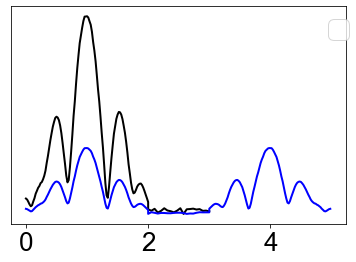

In [35]:
plt.rcParams.update({'font.size': 26,'font.sans-serif': 'Arial'})
plt.yticks([], [])
plt.plot(scan_mod[:,0][:-100],scan_mod[:,1][:-100],linewidth=2,color='black')

scan_mod = []
for x in scan:
    scan_mod.append([x[0],x[1]])

dummy = np.asarray(scan_mod)

for i in np.linspace(0,1,20):
    scan_mod.append([dummy[-1][0]+i,noise(dummy[-1][1])])

back_scan = scan[::-1][1:]

scan_mod = list(scan_mod)

scale_front = len(scan)

for x in back_scan:
    scan_mod.append([3 + back_scan[0][0] - x[0],x[1]])

scan_mod = np.asarray(scan_mod)
#scan_mod[:scale_front,1] = scan_mod[:scale_front,1]/2
plt.plot(scan_mod[:,0],scan_mod[:,1]/3,linewidth=2,color='blue')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.savefig('scan.svg')